# To Predict the optimum number of clusters and represent it visually for the given Iris data set.

Unsupervised Machine Learning - Clustering(Iris Dataset)

# Step 1- Data Pre-processing

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [88]:
#Importing the dataset
data=pd.read_csv("Iris.csv")

In [89]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [90]:
data.shape

(150, 6)

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [92]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [93]:
data.isnull()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
145,False,False,False,False,False,False
146,False,False,False,False,False,False
147,False,False,False,False,False,False
148,False,False,False,False,False,False


In [94]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Step 2 - Finding the Optimal number of clusters using Elbow Method

Elbow Method is one of the most popular methods to determine this optimal value of k.This method uses the concept of WCSS value.WCSS stands for Within Cluster Sum of Squares,which defines the total variations within a cluster.

In [95]:
x=data.iloc[:,[0,1,2,3]].values

In [96]:
#finding optimal number of clusters using the elbow method
from sklearn.cluster import KMeans

In [97]:
#Initializing the list for the values of WCSS
WCSS_list = []


C:\Users\sruth\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


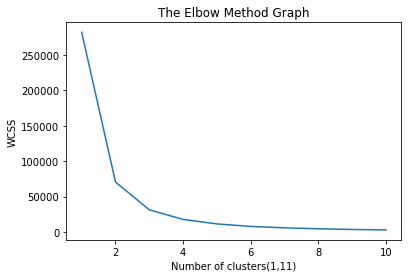

In [98]:
#Using for loop for iterations from 1 to 10
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state = 42)
    kmeans.fit(x)
    WCSS_list.append(kmeans.inertia_)
plt.plot(range(1,11),WCSS_list)
plt.title("The Elbow Method Graph")
plt.xlabel("Number of clusters(1,11)")
plt.ylabel("WCSS")
plt.show()

From the above plot, we can see the elbow point is at 3. So the number of clusters here will be 3.

# Step 3 - Training the k-means algorithm on the training dataset

As we have got the number of clusters, so we can now train the model on the dataset.

In [99]:
#training the K-means model on a dataset
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42)
y_predict=kmeans.fit_predict(x)

# Step 4 - Visualizing the Clusters

The last step is to visualize the clusters. As we have 3 clusters for our model, so we will visualize each cluster one by one.




To visualize the clusters will use scatter plot using plt.scatter() function of matplotlib.

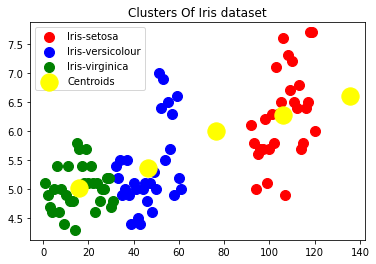

In [100]:
# visualizing the clusters
plt.scatter(x[y_predict==0,0],x[y_predict==0,1],s=100,c='red',label='Iris-setosa')
plt.scatter(x[y_predict==1,0],x[y_predict==1,1],s=100,c='blue',label='Iris-versicolour')
plt.scatter(x[y_predict==2,0],x[y_predict==2,1],s=100,c='green',label='Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters Of Iris dataset')
plt.legend()
plt.show()


output

# Conclusion

The dataset is balanced i.e. equal records are present for all three species.
We have four numerical columns while just one categorical column which in turn is our target column.
A strong correlation is present between petal width and petal length.
The setosa species is the most easily distinguishable because of its small feature size.
The Versicolor and Virginica species are usually mixed and are sometimes hard to separate, while usually Versicolor has
   average feature sizes and virginica has larger feature sizes.
